In [1]:
#Things that still need to be done for time series analysis model:
#1)Apply the time series analysis model on the ESG scores as well + specific KPIs in the context of ESG metrics (e.g. GHG emissions etc.) 
#as features for the time series analysis on the ESG scores (will show this as either another line on the same graph as the stock prices or
#another graph by itself)
#2)Add the specific KPIs in the context of ESG metrics (e.g. GHG emissions etc.) as additional features for the current model that is forecasting
#the stock prices (Should I include these additional features into the model that will predict the stock prices? Or only include them in
#the model for the ESG scores? Or is there an alternative?)
#3)Apply the forecasting model to the Banking and Finance industry itself (maybe can include more companies?)
#4)Further improve on the model - how well it predicts future stock prices etc. (apologies if the model is not very good, I will work on 
#improving it as I still have quite a few things to do for the model)

In [2]:
#Import all of the necessary packages, models etc.
working_directory = "/Users/jerilynchan/Downloads" #can put your working directory here
import os
os.getcwd()
os.chdir(working_directory) #change the working directory to the directory that contains the DBS_stock_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

2025-02-28 21:58:04.580857: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
#Importing the dataset that contains the stock prices from DBS from 2015 to 2025 (will be stored as a Pandas dataframe)
stock_data = pd.read_csv("DBS_stock_data", parse_dates = ["Date"]) #will convert the Date column into a column with Datetime datatype
stock_data.index = stock_data.pop("Date") #will make the Date column become the index of the entire dataframe
print(stock_data.head())

            Close  Volume   Open   High    Low
Date                                          
2015-03-02  14.22  3985.0  14.03  14.22  14.03
2015-03-03  14.17  2199.0  14.17  14.17  14.04
2015-03-04  14.34  1693.0  14.12  14.34  14.12
2015-03-05  14.34   604.0  14.35  14.35  14.34
2015-03-06  14.29   322.0  14.29  14.29  14.29


In [38]:
#Using only the Close column (the column that contains the prices of the stock at the end of each trading day)(will include ESG metrics
#such as GHG emissions etc. if needed)
#maybe can incorporate other aspects such as simple moving average to improve on the model (will work on this)
stock_data_close = stock_data[["Close"]]

In [39]:
#Normalizing the data (will scale the data between 0 to 1 using MinMaxScaler)
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(stock_data_close)

In [40]:
#Splitting the data into training and testing sets (can be adjusted, but I will just use 75% for training and 25% for testing)
training_set_size = 0.75 #the training set size that can be adjusted
train_size = int(len(scaled_data) * training_set_size)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [41]:
#Preparing the data for the LSTM model
chosen_time_step = 50 #represents the number of data points that will be used to predict the next value (e.g. if chosen_time_step is 60, then
#the past 50 days of data will be used to predict the next value of in terms of the stock price)(can be adjusted)
def create_dataset(data, time_step = chosen_time_step): 
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [42]:
#Creating the datasets for training and testing
X_train, y_train = create_dataset(train_data, chosen_time_step)
X_test, y_test = create_dataset(test_data, chosen_time_step)

In [43]:
#Reshaping input data - will be in the format of [samples, time steps, features] (required by the LSTM model):
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
#Building the LSTM model (will improve on this model - maybe can add more layers etc.)
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #adding a LSTM layer
model.add(Dropout(0.2)) #adding Dropout for regularization (will help to prevent overfitting)
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1)) #output layer that will predict the next day's stock price
model.compile(optimizer = "adam", loss = "mean_squared_error") #will compile the model

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
#Training the model (will try tuning the parameters - e.g. increasing the epoch size etc.)
number_of_epochs = 10
batch_sized = 32
model.fit(X_train, y_train, epochs = number_of_epochs, batch_size = batch_sized, validation_data = (X_test, y_test))

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0254 - val_loss: 0.0039
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0012 - val_loss: 0.0011


In [ ]:
#Code that has been commented out below - more for trying to check how well the forecasting model makes predictions from the actual data (
#will use the code to try and improve on the model)

In [25]:
#Make predictions on the test data using the model
#predictions = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [26]:
#Invert the scaling to get the actual stock prices
#predictions = scaler.inverse_transform(predictions)
#y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Plotting the results (comparing the actual stock prices and the predicted stock prices)
#plt.figure(figsize = (14, 6))
#plt.plot(y_test_actual, color = 'blue', label = 'Actual Stock Price')
#plt.plot(predictions, color = 'red', label = 'Predicted Stock Price')
#plt.title('Stock Price Prediction Using LSTM')
#plt.xlabel('Time')
#plt.ylabel('Stock Price')
#plt.legend()
#plt.show()

In [47]:
#Forecasting the stock prices (I tried the model and it does not predict the stock prices very well for many number of days - will work on
#improving it)
forecasting_days = 30
last_input = scaled_data[-chosen_time_step:].reshape(1, chosen_time_step, 1) #will get the past data that will be used as the initial input
#for forecasting (based on the number of days that will be used to predict the future day's value)
forecasted_prices = []
#predict the stock price for the future days (based on the forecasting_days value)
for i in range(forecasting_days):
    next_day = model.predict(last_input)
    next_day_price = scaler.inverse_transform(next_day) #will invert the scaling to get the actual stock prices
    forecasted_prices.append(next_day_price[0, 0])
    last_input = np.append(last_input[:, 1:, :], next_day.reshape(1, 1, 1), axis = 1) #update the input for the next prediction + append the
#latest predicted value
forecasted_dates = pd.date_range(start = stock_data.index[-1] + pd.Timedelta(days = 1), periods = forecasting_days, freq = 'B') #will generate 
#the forecasted dates

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

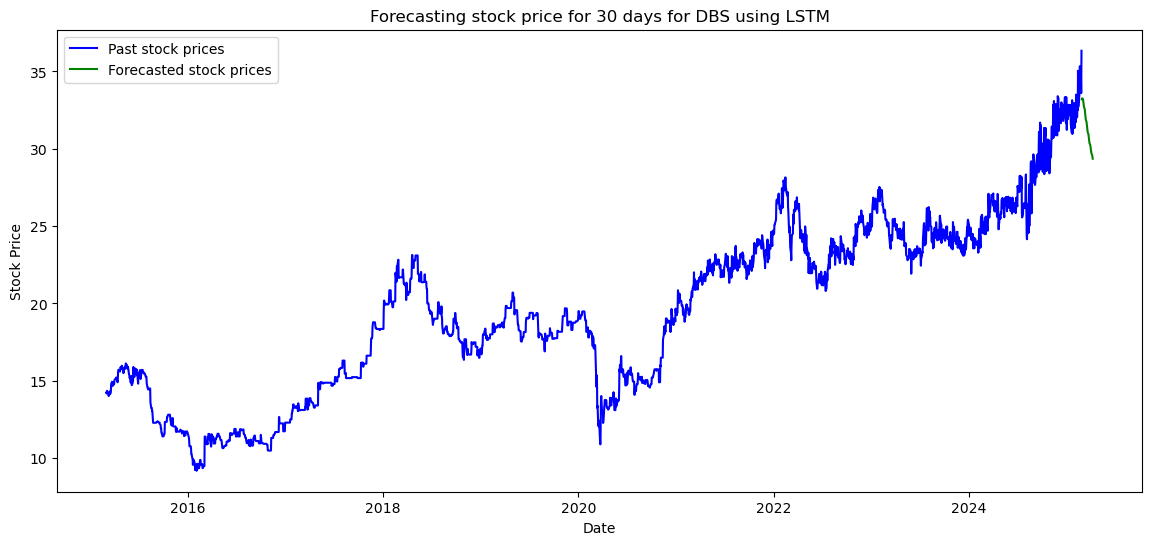

In [48]:
#Plotting the past/historical stock prices: with the forecasted stock prices:
plt.figure(figsize = (14, 6))
plt.plot(stock_data.index, stock_data_close["Close"], color = "blue", label = "Past stock prices")
plt.plot(forecasted_dates, forecasted_prices, color = "green", label = "Forecasted stock prices")
plt.title(f'Forecasting stock price for {forecasting_days} days for DBS using LSTM')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()